# Twitter Bot Detection

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import csv
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Importing the Data and Cleaning it 

In [2]:
#import train and test data sets
train = pd.read_csv("/Users/akshay/Desktop/GitHub/Twitter_Bot_Detection/Train_data.csv")
test = pd.read_csv("/Users/akshay/Desktop/GitHub/Twitter_Bot_Detection/Test_data.csv")

# Check if 'has_extended_profile' attribute is null or not
train['has_extended_profile'] = train['has_extended_profile'].fillna(False)
test['has_extended_profile'] = test['has_extended_profile'].fillna(False)

# Check if 'location' attribute is null or not
train['location']=pd.isnull(train.location).astype(int)
test['location']=pd.isnull(test.location).astype(int)

#Check if 'description' attribute is null or not
train['description'] = train['description'].fillna('No Description')
test['description'] = test['description'].fillna('No Description')    


### Check if 'Name', 'Screen_Name' or 'Description' contain 'bot'

In [3]:
### Check if the Screen_Name of the User has 'bot' in it
train_sname_bot=[]
for row in train.screen_name:
    if ('bot' in row):
        train_sname_bot.append(1)
    else:
        train_sname_bot.append(0)
train['name_bot']=train_sname_bot

test_sname_bot=[]
for row in test.screen_name:
    if ('bot' in row):
        test_sname_bot.append(1)
    else:
        test_sname_bot.append(0)
test['sname_bot']=test_sname_bot

### Check if the Name of the User has 'bot' in it
train_name_bot=[]
for row in train.name:
    if ('bot' in row):
        train_name_bot.append(1)
    else:
        train_name_bot.append(0)
train['sname_bot']=train_name_bot      

test_name_bot=[]
for row in test.name:
    if ('bot' in row):
        test_name_bot.append(1)
    else:
        test_name_bot.append(0)
test['name_bot']=test_name_bot

### If either of Screen_name of Name has 'bot' in it then make a new parameter to train 'name_bot'
train['name_bot']=train.apply(lambda row: (row['sname_bot'] or row['name_bot']),axis=1)
test['name_bot']=test.apply(lambda row: (row['sname_bot'] or row['name_bot']),axis=1)


### Check if the Description of the User has 'bot' in it
train_des_bot=[]
for line in train['description']:
        if ('bot' in line):
            train_des_bot.append(1)
        else:
            train_des_bot.append(0)
train['des_bot']=train_des_bot

test_des_bot=[]
for row in test['description']:
        if ('bot'in row):
            test_des_bot.append(1)
        else:
            test_des_bot.append(0)
test['des_bot']=test_des_bot

### Check How much every parameter contributes:

In [4]:
print (train[['verified', 'bot']].groupby(['verified'], as_index=False).mean())

  verified       bot
0    False  0.611305
1     True  0.013566


In [5]:
print (train[['default_profile', 'bot']].groupby(['default_profile'], as_index=False).mean())

  default_profile       bot
0           False  0.292135
1            True  0.701826


In [6]:
print (train[['default_profile_image', 'bot']].groupby(['default_profile_image'], as_index=False).mean())

  default_profile_image       bot
0                 False  0.457979
1                  True  0.754386


In [7]:
print (train[['has_extended_profile', 'bot']].groupby(['has_extended_profile'], as_index=False).mean())

  has_extended_profile      bot
0                False  0.51087
1                 True  0.23000


In [8]:
print (train[['des_bot', 'bot']].groupby(['des_bot'], as_index=False).mean())

   des_bot       bot
0        0  0.403383
1        1  0.957295


In [9]:
print (train[['name_bot', 'bot']].groupby(['name_bot'], as_index=False).mean())

   name_bot       bot
0         0  0.444865
1         1  0.974790


In [10]:
print (train[['friends_count', 'bot']].groupby(['friends_count'], as_index=False).mean())

     friends_count       bot
0                0  0.959641
1                1  0.960265
2                2  0.907407
3                3  0.852941
4                4  0.920000
5                5  0.833333
6                6  0.687500
7                7  0.714286
8                8  0.500000
9                9  0.500000
10              10  0.375000
11              11  0.666667
12              12  0.700000
13              13  0.777778
14              14  0.727273
15              15  0.666667
16              16  0.400000
17              17  0.666667
18              18  0.750000
19              19  0.166667
20              20  0.800000
21              21  0.625000
22              22  0.666667
23              23  0.250000
24              24  0.750000
25              25  0.600000
26              26  0.800000
27              27  0.750000
28              28  0.777778
29              29  0.875000
..             ...       ...
944          29303  0.000000
945          31049  0.000000
946          3

In [11]:
print (train[['followers_count', 'bot']].groupby(['followers_count'], as_index=False).mean())

      followers_count       bot
0                   0  0.952381
1                   1  0.906977
2                   2  0.790698
3                   3  0.913043
4                   4  0.695652
5                   5  0.666667
6                   6  0.777778
7                   7  0.823529
8                   8  0.937500
9                   9  0.571429
10                 10  0.647059
11                 11  0.750000
12                 12  0.538462
13                 13  0.454545
14                 14  0.666667
15                 15  0.466667
16                 16  0.600000
17                 17  1.000000
18                 18  0.571429
19                 19  1.000000
20                 20  0.818182
21                 21  0.500000
22                 22  0.444444
23                 23  0.750000
24                 24  0.142857
25                 25  0.400000
26                 26  0.800000
27                 27  0.500000
28                 28  0.000000
29                 29  0.833333
...     

In [12]:
print (train[['favourites_count', 'bot']].groupby(['favourites_count'], as_index=False).mean())

     favourites_count       bot
0                   0  0.791118
1                   1  0.750000
2                   2  0.700000
3                   3  0.631579
4                   4  0.633333
5                   5  0.600000
6                   6  0.526316
7                   7  0.562500
8                   8  0.384615
9                   9  0.153846
10                 10  0.142857
11                 11  0.571429
12                 12  0.555556
13                 13  0.400000
14                 14  0.583333
15                 15  0.411765
16                 16  0.400000
17                 17  0.285714
18                 18  0.214286
19                 19  0.571429
20                 20  0.307692
21                 21  0.846154
22                 22  0.444444
23                 23  0.769231
24                 24  0.500000
25                 25  0.500000
26                 26  0.333333
27                 27  0.400000
28                 28  0.375000
29                 29  0.666667
..      

In [13]:
print (train[['statuses_count', 'bot']].groupby(['statuses_count'], as_index=False).mean())

      statuses_count       bot
0                  0  0.854545
1                  1  0.724138
2                  2  0.478261
3                  3  0.588235
4                  4  0.785714
5                  5  0.714286
6                  6  0.285714
7                  7  0.300000
8                  8  0.571429
9                  9  0.142857
10                10  0.250000
11                11  0.750000
12                12  0.166667
13                13  0.250000
14                14  0.600000
15                15  0.428571
16                16  0.250000
17                17  0.428571
18                18  0.500000
19                19  0.600000
20                20  0.500000
21                21  0.500000
22                22  1.000000
23                23  1.000000
24                24  0.666667
25                25  0.333333
26                26  0.714286
27                27  0.375000
28                28  0.000000
29                29  0.333333
...              ...       ...
1636    

In [14]:
print (train[['location', 'bot']].groupby(['location'], as_index=False).mean())

   location       bot
0         0  0.365493
1         1  0.661330


### Choose Parameters to Train

In [15]:
## As all the above parameters contribute significantly in the decision, we train our model with them.

X_train=train[['followers_count','friends_count','favourites_count','statuses_count','verified','default_profile','default_profile_image','has_extended_profile','location','des_bot','name_bot']].astype(int)
Y_train=train.bot

X_test=test[['followers_count','friends_count','favourites_count','statuses_count','verified','default_profile','default_profile_image','has_extended_profile','location','des_bot','name_bot']].astype(int)
Y_test=test.bot

## Comparison of Classifiers based on Accuracy, Precision, Recall, F1 and AUC 

In [16]:
classifiers = [
    BernoulliNB(),
    MultinomialNB(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression()]

log_cols1 = ["Classifier", "Accuracy"]
log1      = pd.DataFrame(columns=log_cols1)
log_cols2 = ["Classifier", "Precision"]
log2      = pd.DataFrame(columns=log_cols2)
log_cols3 = ["Classifier", "Recall"]
log3      = pd.DataFrame(columns=log_cols3)
log_cols4 = ["Classifier", "F1"]
log4      = pd.DataFrame(columns=log_cols4)
log_cols5 = ["Classifier", "AUC"]
log5      = pd.DataFrame(columns=log_cols5)

acc_dict = {}
prec_dict = {}
recall_dict = {}
f1_dict = {}
auc_dict = {}

for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(Y_test, train_predictions)
        prec = precision_score(Y_test, train_predictions, average='weighted')
        rec = recall_score(Y_test, train_predictions, average='weighted')
        f1 = f1_score(Y_test, train_predictions, average='weighted')
        auc = roc_auc_score(Y_test, train_predictions, average='weighted')
        
        if name in acc_dict:
             acc_dict[name] += acc
        else:
             acc_dict[name] = acc
            
        if name in prec_dict:
            prec_dict[name] += prec
        else:
            prec_dict[name] = prec
            
        if name in recall_dict:
             recall_dict[name] += rec
        else:
             recall_dict[name] = rec
            
        if name in f1_dict:
            f1_dict[name] += f1
        else:
            f1_dict[name] = f1
            
        if name in auc_dict:
            auc_dict[name] += auc
        else:
            auc_dict[name] = f1

for clf in acc_dict:
    log_entry1 = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols1)
    log1 = log1.append(log_entry1)
    
for clf in prec_dict:
    log_entry2 = pd.DataFrame([[clf, prec_dict[clf]]], columns=log_cols2)
    log2 = log2.append(log_entry2)
    
for clf in recall_dict:
    log_entry3 = pd.DataFrame([[clf, recall_dict[clf]]], columns=log_cols3)
    log3 = log3.append(log_entry3)

for clf in f1_dict:
    log_entry4 = pd.DataFrame([[clf, f1_dict[clf]]], columns=log_cols4)
    log4 = log4.append(log_entry4)

for clf in auc_dict:
    log_entry5 = pd.DataFrame([[clf, auc_dict[clf]]], columns=log_cols5)
    log5 = log5.append(log_entry5)

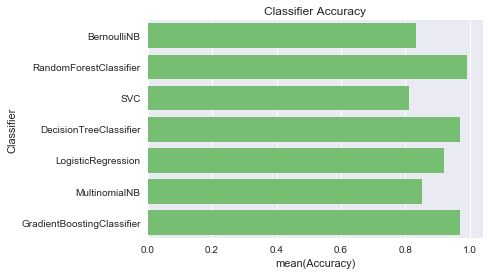

In [17]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log1, color="g")

#### The Accuracy values for all the classifiers :

In [18]:
log1

,Classifier,Accuracy
0,BernoulliNB,0.831683
0,RandomForestClassifier,0.990099
0,SVC,0.811881
0,DecisionTreeClassifier,0.970297
0,LogisticRegression,0.920792
0,MultinomialNB,0.851485
0,GradientBoostingClassifier,0.970297


#### By Comparing the above classifiers we choose BernouliNB, Decision Tree Classifier, Gradient Boost Classifier and MultinomialNB as our final classifers

#### Plot of Precision vs Classifiers

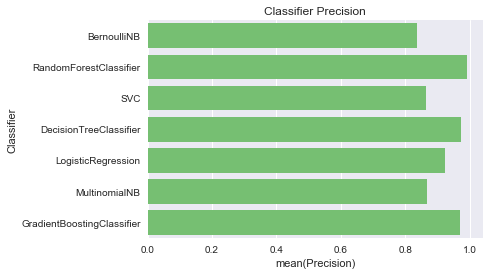

In [19]:
plt.xlabel('Precision')
plt.title('Classifier Precision')

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log2, color="g")

#### Plot of Recall vs Classifiers

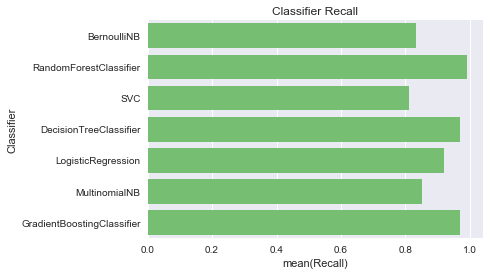

In [20]:
plt.xlabel('Recall')
plt.title('Classifier Recall')

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log3, color="g")

#### Plot of F1 vs Classifiers

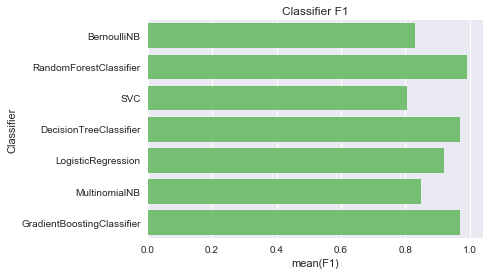

In [21]:
plt.xlabel('F1')
plt.title('Classifier F1')

sns.set_color_codes("muted")
sns.barplot(x='F1', y='Classifier', data=log4, color="g")

#### Plot of AUC vs Classifiers

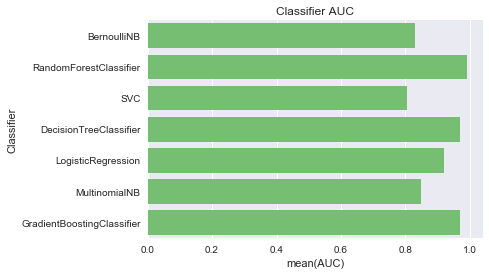

In [22]:
plt.xlabel('AUC')
plt.title('Classifier AUC')

sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Classifier', data=log5, color="g")

### The Recall, Precision, F1 and AUC scores support our choices of Classifiers

### Using the Classifiers to Predict our result:

In [23]:
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier()]

Output = pd.DataFrame()
Output["True Value"]= Y_test

for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        train_predictions = clf.predict(X_test)
        Output['OP with '+name]=train_predictions
        
Output

,True Value,OP with RandomForestClassifier,OP with LogisticRegression,OP with DecisionTreeClassifier,OP with GradientBoostingClassifier
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0
